# Portofolio: RFM Analysis - Optimize Business Strategy using Customer Data Analysis

## Business Understanding

### Introduction

RFM analysis is a method used to analyze customer behaviour using recency, frequency, and monetary where recency answers when is the latest purchase each customer, frequency answers how many times each customer buy products, and monetary answers how much money each customer spend to buy products. 

RFM analysis helps us to increase customer retention, optimize marketing campigns, and identify which customers has high value.

### Objectives

The Marketing team needs a customer segmentation so they can optimize business marketing strategy for each customer. We need to figure which customers:
- Need up-sell or cross-sell promotion to gain more purchase.
- Need loyalty program.
- Need educational content to build trust and knowledge or time-limited promotion.

### Dataset and Tools needed

We well use seblak prasmanan database. Seblak prasmanan is one of the new traditional Indonesian food. It's a boiled krupuk with various topping and what make seblak prasmanan special is you can take only topping that you like as many as you want.

This analysis is using Python as the main tool to process the data and the RFM analysis. We will not use all variables to analyze. We only need the id_customer, transaction_date, and money_spent.

### The Methodology

So far, we knew that we need are id_customer, transaction_date, and money_spent. Let's see the metrics we need and how to calculate it:
- To find the recency score, we need to calculate today date minus the newest date the customers bought. For example, customer 03 bought something in '03-04-2023' and today is '06-04-2024'. It means '06-04-2024' - '03-04-2024' = 3 days. The smaller day you get, the better you get score. that's recency.
- To find the frequency score, you just need to count how many times the customers buy. This must be the easiest calculation in RFM analysis.
- To find the monetary is sometimes tricky. Monetary means how much money they spent to buy our products. In this case, we use 'jumlah' variable (which means amount) multiple by 'harga_jual_satuan' (which means price per item).

After that, we will separate them into three categories for each metrics. Recency will get low, medium, and high category. Also the same with Frequency and Monetary. To make it easier to calculate, we will use 1 for low, 2 for medium, and 3 for high.

Finally, we will give weight for each metrics. In this example, we will give weight 20% for recency, 35% for frequency, and 45% for monetary. And then sum them up.

## Data Understanding

### Load Library and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('data/seblak_dataset.csv')
print(dataset.head())

   customer_id transaction_date       city customers  purchase
0            7       2023-09-23     Bekasi    member       136
1           22       2023-05-05      Depok    member       142
2           36       2023-12-16  Tangerang    member       156
3           28       2023-03-19     Bekasi    member       179
4           24       2023-01-19     Bekasi    member       164


### Data Profiling

In [4]:
# column type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       3936 non-null   int64 
 1   transaction_date  3936 non-null   object
 2   city              3936 non-null   object
 3   customers         3936 non-null   object
 4   purchase          3936 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 153.9+ KB


In [5]:
# missing value
dataset.isnull().sum()

customer_id         0
transaction_date    0
city                0
customers           0
purchase            0
dtype: int64

In [6]:
# duplicated value
dataset.duplicated().sum()

np.int64(0)

NOTE:
- tanggal_transaksi which means datetime is still an object. we can change data format in preprocessing section.
- the data has no missing value
- the data has no duplicated value

### Descriptive Statistics

In [8]:
dataset['transaction_date'].value_counts()

transaction_date
2023-11-15    34
2023-12-08    28
2023-12-31    28
2023-10-06    27
2023-12-24    26
              ..
2023-01-27     1
2023-01-06     1
2023-01-02     1
2023-03-29     1
2023-02-13     1
Name: count, Length: 362, dtype: int64

NOTE:
- 2023-11-15 is the date with the highest transaction, totalling 34.
- 2023-02-13 is the date with the least transaction, totalling 1 transaction.

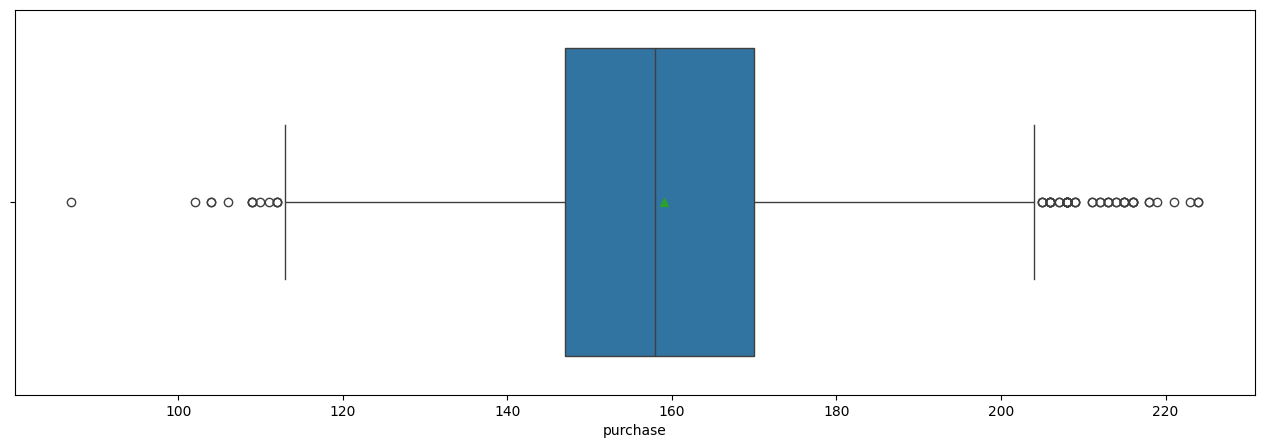

count    3936.000
mean      159.074
std        18.191
min        87.000
25%       147.000
50%       158.000
75%       170.000
max       224.000
Name: purchase, dtype: float64


In [11]:
plt.figure(figsize=(16,5))
sns.boxplot(dataset['purchase'], orient='h', showmeans=True)
plt.show()
print(dataset['purchase'].describe().round(3))

NOTE:
- from the boxplot, we can see that the distribution is kind of normally distributed but the mean is slightly pulled by the highest value although the mean is still close to the median. we need to check whether or not the data is normally distributed.
- there are so much outliers where they spent money more than the average customers.

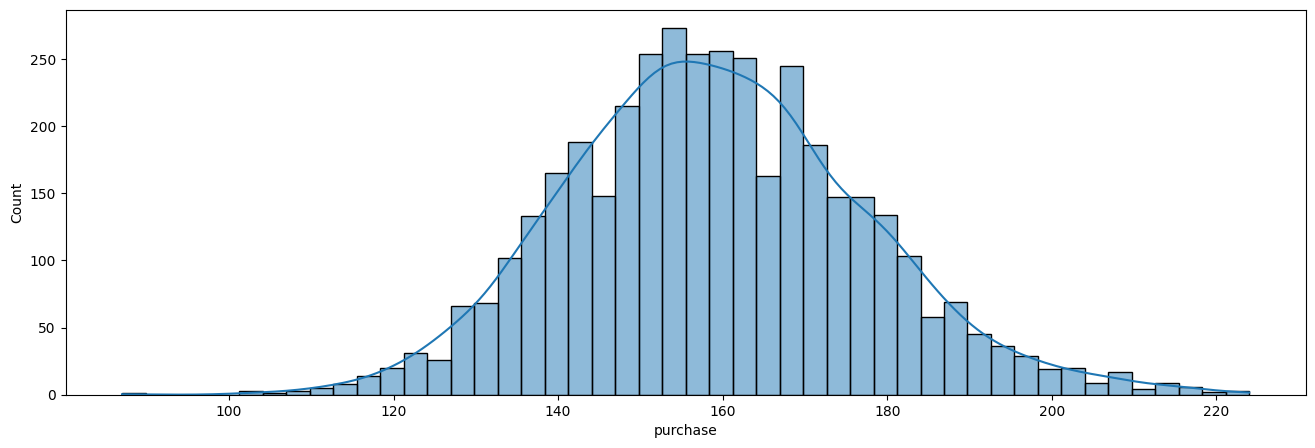

In [13]:
plt.figure(figsize=(16,5))
sns.histplot(dataset['purchase'], kde=True)
plt.show()

NOTE:

- we can see from the figure that the variable has two long tails.
- from the histogram, people tend to spend money nearly $160.
- further analysis: try seeing the trend over month.

## Data Preprocessing

In [14]:
dataset['transaction_date'] = pd.to_datetime(dataset['transaction_date'])

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       3936 non-null   int64         
 1   transaction_date  3936 non-null   datetime64[ns]
 2   city              3936 non-null   object        
 3   customers         3936 non-null   object        
 4   purchase          3936 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 153.9+ KB


In [16]:
print(dataset.tail())

      customer_id transaction_date       city customers  purchase
3931          574       2023-12-15      Bogor    casual       135
3932          590       2023-12-29     Bekasi    casual       142
3933          560       2023-12-12     Bekasi    casual       160
3934          560       2023-12-16      Bogor    casual       180
3935          571       2023-12-05  Tangerang    casual       149


In [17]:
monetary = dataset.groupby('customer_id')['purchase'].sum()
recency = dataset['transaction_date'].max() - dataset.groupby('customer_id')['transaction_date'].max()
frequency = dataset.groupby('customer_id')['customer_id'].count()

In [18]:
pivot_dataset = pd.concat([recency, frequency, monetary], axis=1)

In [19]:
pivot_dataset.keys()

Index(['transaction_date', 'customer_id', 'purchase'], dtype='object')

In [20]:
pivot_dataset.rename(columns={'transaction_date':'recency',
                              'customer_id': 'frequency',
                              'purchase': 'monetary'}, inplace=True)

In [21]:
print(pivot_dataset.head())

            recency  frequency  monetary
customer_id                             
1            3 days         20      3280
2            5 days          9      1459
3           44 days          6       964
4           18 days         10      1620
5           16 days         12      2072


## Modeling

In [22]:
pivot_dataset['recency_score'] = pivot_dataset['recency'].rank(ascending=False)
pivot_dataset['frequency_score'] = pivot_dataset['frequency'].rank(ascending=True)
pivot_dataset['monetary_score'] = pivot_dataset['monetary'].rank(ascending=True)
pivot_dataset['recency_segment'] = pd.qcut(x=pivot_dataset['recency_score'], q=3, labels=[1, 2, 3]).astype('int')
pivot_dataset['frequency_segment'] = pd.qcut(x=pivot_dataset['frequency_score'], q=3, labels=[1, 2, 3]).astype('int')
pivot_dataset['monetary_segment'] = pd.qcut(x=pivot_dataset['monetary_score'], q=3, labels=[1, 2, 3]).astype('int')
pivot_dataset['rfm_score'] = (((pivot_dataset['recency_segment']*0.2)+(pivot_dataset['frequency_segment']*0.3)+(pivot_dataset['monetary_segment']*0.5))/3*100).round()
pivot_dataset['rfm_segment'] = pivot_dataset['recency_segment'].astype('str') + pivot_dataset['frequency_segment'].astype('str') + pivot_dataset['monetary_segment'].astype('str')
print(pivot_dataset.head())

            recency  frequency  monetary  recency_score  frequency_score  \
customer_id                                                                
1            3 days         20      3280          487.0            537.0   
2            5 days          9      1459          460.0            388.0   
3           44 days          6       964          136.5            277.0   
4           18 days         10      1620          306.5            414.5   
5           16 days         12      2072          330.5            457.0   

             monetary_score  recency_segment  frequency_segment  \
customer_id                                                       
1                     539.0                3                  3   
2                     397.0                3                  3   
3                     278.0                1                  2   
4                     423.0                2                  3   
5                     474.0                2                  3  

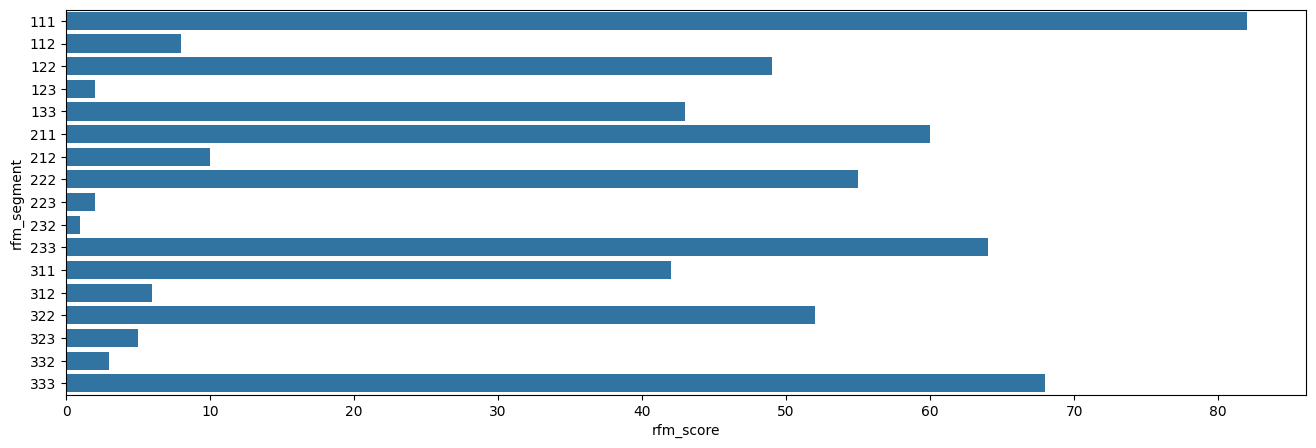

In [23]:
plt.figure(figsize=(16,5))
sns.barplot(pivot_dataset.groupby('rfm_segment')['rfm_score'].count(), orient='h')
plt.show()

In [24]:
pivot_dataset.groupby(['rfm_score','rfm_segment'])['rfm_score'].count()

rfm_score  rfm_segment
33.0       111            82
40.0       211            60
47.0       311            42
50.0       112             8
57.0       212            10
60.0       122            49
63.0       312             6
67.0       222            55
73.0       322            52
77.0       123             2
           232             1
83.0       223             2
           332             3
87.0       133            43
90.0       323             5
93.0       233            64
100.0      333            68
Name: rfm_score, dtype: int64

## Insights

### Interpretation and Reporting

There are 68 customers that has score 100 which is excellent and we need to maintain it. There are 64 customers that gets score 93 and it will be more because we can lead 43 customers from low recency to medium recency.

There are 49 customers with low recency, 55 customers with medium recency, and 52 customers with high recency. Three of them are medium frequency and medium monetary.

There are 10 customers with medium recency, low frequency, and medium monetary. These customers have bot quite recently, only bought few times, but have medium money spent.

There are 82 customers with low recency, 60 customers with medium recency, and 42 customers with high recency. Three of them are low frequency and low monetary.

The rest of the category are small groups. Let's focus on the big groups.

### Actions

For R3F3M3 segment is our top performers. These customers don't need unnecessary promo. Just give them retention campaign like loyalty rewards or vip discounts. They will probably love it.

For R2-R1F3M3 categories are our potential customers. They had high transaction and high frequency but had lost interest to our products. These customers need "we missed you" promo and limited time offer which is a big discount so they come back to our products. It needs to be highlighted that this promo cannot be bigger than the promo you gave to the top performers. Otherwise, they will feel jealous.

Finding new customers are always harder than winning past customers. So, although recency gets 20% weight of rfm analysis, recency is the most crucial process to retention. When the recency is high already (R3), continue to frequency strategy that make customer buy more often (F3). When it's done, doing some up-selling and cross-selling products to gain transaction (M3).

For R2-R1F2M2 categories, better do limited time offer so the customers instantly purchase our products. When they become R3F2M2, offer loyalty program like give them ten-empty-block card. When they purchase our products, they will get stamp and when the card is full of stamp, they get free product or food if it's foods and beverages. You can also offer discount for their next purchase for R3F1M1 category. 

For R1F1M1 category, they are past customers, rarely purchased, and spent small amount of money. Try giving broader promo that can apply for finding new customers and winning pas customers. Also make personalized promo to show them that we know them.

Categories:
- R2F3M3 (68 customers) focuses on limited time offer.
- R1F3M3 (43 customers) focuses on limited time offer.
- R3F2M2 (52 customers) focuses on loyalty program.
- R2F2M2 (55 customers) focuses on limited time offer.
- R1F2M2 (49 customers) focuses on limited time offer.
- R3F1M1 (42 customers) focuses on loyalty program.
- R2F1M1 (60 customers) focuses on limited time offer.

## Further Analysis

- Do survival analysis to understand customer lifetime value, predicting how often customers purchase.
- Do cohort analysis to understand retention rate, observing customer behaviour based on their first purchase.
- Do churn analysis to understand churn rate, identifying what factors make customers stop purchasing or using our products.